# Questão 1

Implemente e treine duas redes neurais artificiais para o problema de classificação de dígitos  
manuscritos, utilizando a base de dados MNIST, disponível em:  
https://www.kaggle.com/datasets/hojjatk/mnist-dataset.  

A primeira rede deve ser um Perceptron de Múltiplas Camadas (MLP) tradicional,  
enquanto a segunda deve ser uma Rede Neural Convolucional (CNN).  

Compare o desempenho das duas redes por meio da análise da curva  
do erro médio durante o treinamento e da matriz de confusão obtida no conjunto de teste.

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
print(np.unique(y_train))
print(len(np.unique(y_train)))

[0 1 2 3 4 5 6 7 8 9]
10


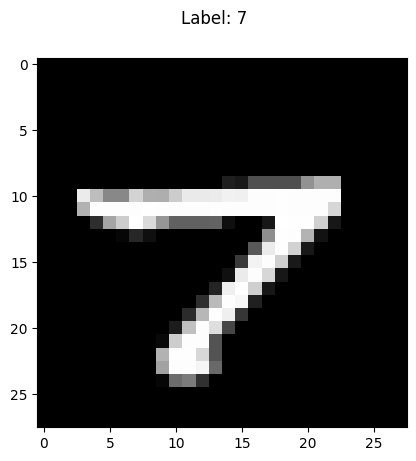

In [11]:
# reconstruct a sample image
import matplotlib.pyplot as plt
random_index = np.random.randint(0, len(x_train))

plt.imshow(x_train[random_index], cmap='gray')
plt.suptitle(f'Label: {y_train[random_index]}')

plt.show()

In [12]:
x_train.shape
# 60000 imagens, 28x28 pixels

# 1 canal (escala de cinza)
# 1 canal = 1 matriz de 28x28
# 60000 imagens = 60000 matrizes de 28x28

(60000, 28, 28)

## Perceptron Multi-Camadas

In [13]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128)

model_mlp.evaluate(x_test, y_test)

/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8253 - loss: 0.6261
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9498 - loss: 0.1813
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1236
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0917
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9788 - loss: 0.0739
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0624
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0492
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0438
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0351
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9722 - loss: 0.0858


[0.07290147989988327, 0.9763000011444092]

## Rede Neural Convolucional

In [14]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

history_cnn = model_cnn.fit(x_train_cnn, y_train, epochs=10, batch_size=128)

model_cnn.evaluate(x_test_cnn, y_test)

/home/erlo/.localvenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8591 - loss: 0.4817
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9812 - loss: 0.0607
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9875 - loss: 0.0403
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9906 - loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9928 - loss: 0.0236
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9942 - loss: 0.0176
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9956 - loss: 0.0135
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9966 - loss: 0.0109
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9970 - loss: 0.0087
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9974 - loss: 0.0076
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0424


[0.03394352272152901, 0.9901000261306763]

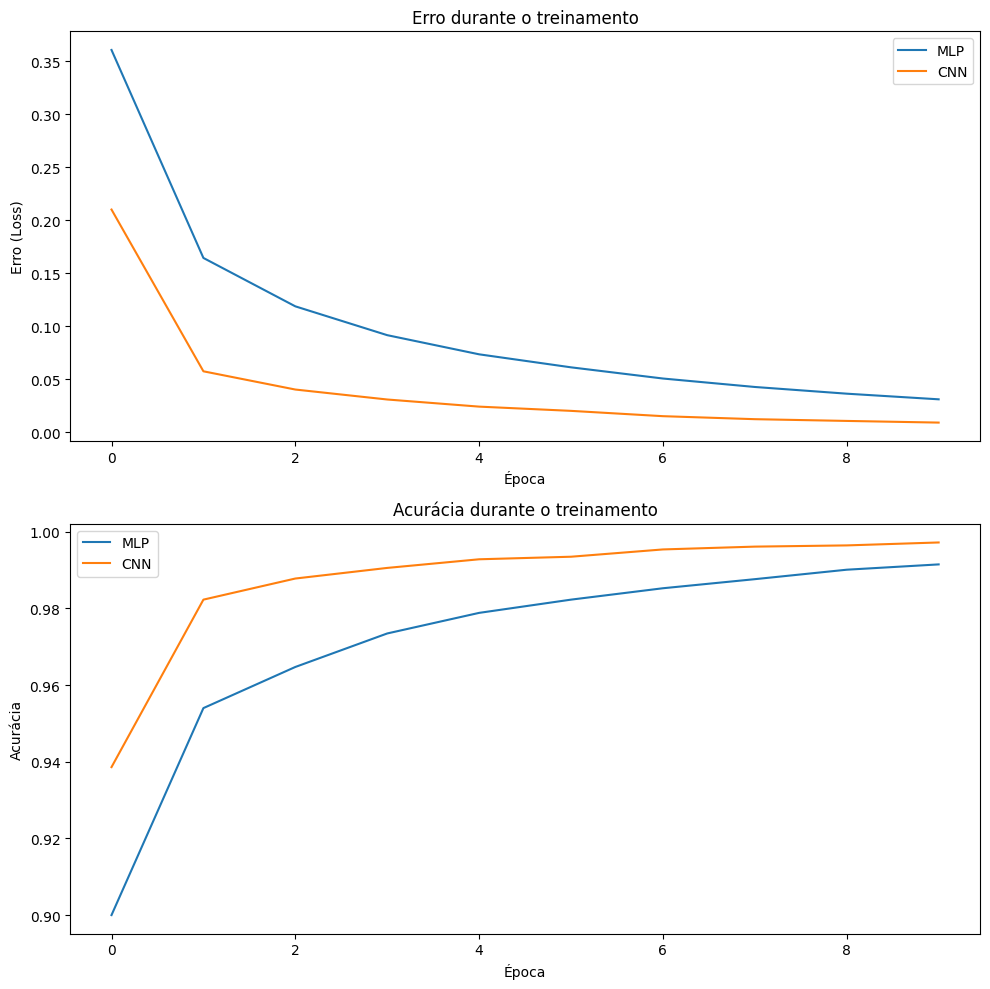

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(history_mlp.history['loss'], label='MLP')
ax1.plot(history_cnn.history['loss'], label='CNN')
ax1.set_title('Erro durante o treinamento')
ax1.set_xlabel('Época')
ax1.set_ylabel('Erro (Loss)')
ax1.legend()

ax2.plot(history_mlp.history['accuracy'], label='MLP')
ax2.plot(history_cnn.history['accuracy'], label='CNN')
ax2.set_title('Acurácia durante o treinamento')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')
ax2.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9722 - loss: 0.0858
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0424


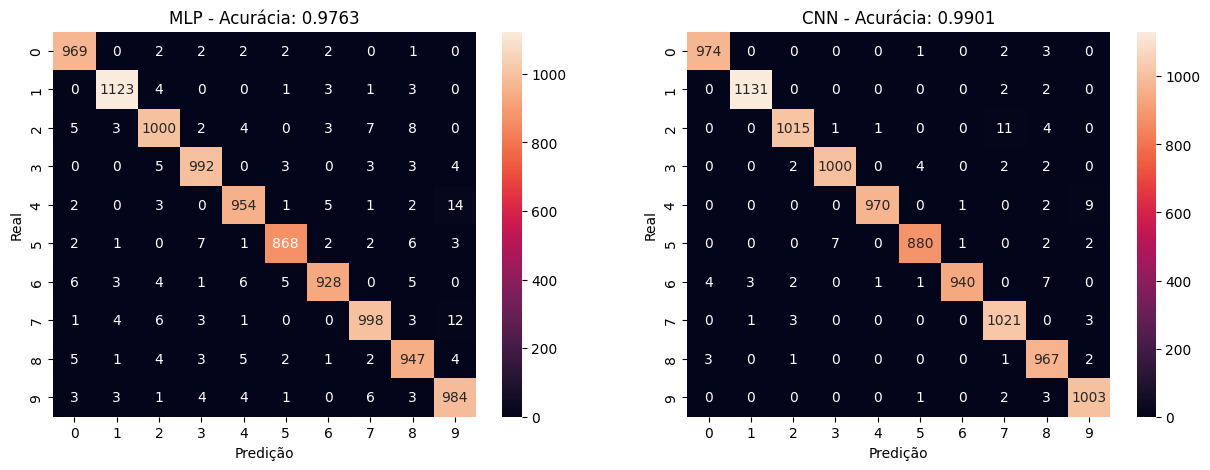

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_cnn = model_cnn.predict(x_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

y_pred_mlp = model_mlp.predict(x_test)
y_pred_mlp = np.argmax(y_pred_mlp, axis=1)


fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', ax=ax[0])
ax[0].set_title(f'MLP - Acurácia: {(model_mlp.evaluate(x_test, y_test)[1]):.4f}')
ax[0].set_xlabel('Predição')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt='d', ax=ax[1])
ax[1].set_title(f'CNN - Acurácia: {(model_cnn.evaluate(x_test_cnn, y_test)[1]):.4f}')
ax[1].set_xlabel('Predição')
ax[1].set_ylabel('Real')

plt.show()

# Questão 2

Implemente e treine uma Rede Neural Convolucional (CNN) para resolver o problema de
classificação de objetos em imagens, utilizando a base de dados CIFAR-10, disponível em:
https://www.cs.toronto.edu/~kriz/cifar.html.
Apresente a curva do erro médio ao longo do treinamento, bem como a matriz de confusão do
modelo avaliado sobre o conjunto de teste.

Loaded in this way, each of the batch files contains a dictionary with the following elements:

    data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
    labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.


The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

    label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.


In [1]:
import tarfile
import pickle
import numpy as np

In [2]:
#################### VERSÃO 1 ####################

def unpickle(file):
    """
    Unpickles a file from a tar.gz archive.

    Args:
        file (str): The path to the tar.gz archive.

    Returns:
        dict: The unpickled dictionary.
    """
    data = {}
    with tarfile.open(file, 'r:gz') as tar:
        for member in tar.getmembers():
            if 'data_batch' in member.name:
                f = tar.extractfile(member)
                if f is not None:
                    batch_data = pickle.load(f, encoding='bytes')
                    data.update(batch_data) # Update data with data from current batch

    return data # Return the collected data

In [3]:
unpickle('/content/cifar-10-python.tar.gz')

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [4]:
data = unpickle('/content/cifar-10-python.tar.gz')
print(data)

{b'batch_label': b'training batch 1 of 5', b'labels': [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [5]:
def organize_cifar_batches(data):
    """
    Organizes CIFAR-10 data into separate arrays for images and labels, grouped by batch.

    Args:
        data (dict): The unpickled CIFAR-10 data.

    Returns:
        tuple: A tuple containing:
            - images_by_batch (list): A list of NumPy arrays, where each array contains the images for a batch.
            - labels_by_batch (list): A list of NumPy arrays, where each array contains the labels for a batch.
    """
    images_by_batch = []
    labels_by_batch = []

    num_batches = 5  # CIFAR-10 has 5 data batches

    for batch_num in range(1, num_batches + 1):
        batch_key = f'data_batch_{batch_num}'
        if batch_key in data:
            batch_data = data[batch_key] # Extract data from current batch using its key

            images = batch_data[b'data'] # Extract images
            labels = batch_data[b'labels'] # Extract labels

            images_by_batch.append(np.array(images))
            labels_by_batch.append(np.array(labels))

    return images_by_batch, labels_by_batch

# Example usage:
data = unpickle('/content/cifar-10-python.tar.gz')
images_by_batch, labels_by_batch = organize_cifar_batches(data)

# Accessing data for batch 1:
batch1_images = images_by_batch[0]
batch1_labels = labels_by_batch[0]

print(f"Batch 1 Images Shape: {batch1_images.shape}")
print(f"Batch 1 Labels Shape: {batch1_labels.shape}")

IndexError: list index out of range

In [6]:
#################### VERSÃO 2 ####################

def unpickle(file):
    """
    Unpickles a file from a tar.gz archive.

    Args:
        file (str): The path to the tar.gz archive.

    Returns:
        dict: The unpickled dictionary.
    """
    data = {}
    with tarfile.open(file, 'r:gz') as tar:
        for member in tar.getmembers():
            if member.name.startswith('cifar-10-batches-py/data_batch_'):
                f = tar.extractfile(member)
                if f is not None:
                    batch_data = pickle.load(f, encoding='bytes')
                    data[member.name.split('/')[-1]] = batch_data  # Store with batch name as key

    return data

In [7]:
unpickle('/content/cifar-10-python.tar.gz')

{'data_batch_4': {b'batch_label': b'training batch 4 of 5',
  b'labels': [0,
   6,
   0,
   2,
   7,
   2,
   1,
   2,
   4,
   1,
   5,
   6,
   6,
   3,
   1,
   3,
   5,
   5,
   8,
   1,
   4,
   2,
   3,
   2,
   1,
   2,
   8,
   9,
   5,
   0,
   7,
   6,
   7,
   6,
   8,
   8,
   7,
   4,
   9,
   1,
   2,
   6,
   5,
   9,
   4,
   2,
   5,
   1,
   0,
   1,
   1,
   9,
   0,
   7,
   5,
   3,
   9,
   6,
   3,
   3,
   3,
   4,
   1,
   5,
   9,
   7,
   7,
   2,
   9,
   0,
   2,
   8,
   5,
   9,
   6,
   7,
   8,
   4,
   0,
   4,
   9,
   2,
   7,
   1,
   0,
   5,
   1,
   8,
   1,
   6,
   5,
   9,
   7,
   0,
   4,
   5,
   2,
   3,
   5,
   5,
   6,
   0,
   2,
   1,
   1,
   5,
   8,
   5,
   2,
   4,
   2,
   2,
   5,
   3,
   0,
   3,
   0,
   2,
   9,
   1,
   1,
   7,
   3,
   8,
   5,
   4,
   5,
   9,
   6,
   5,
   6,
   4,
   4,
   5,
   5,
   1,
   1,
   5,
   6,
   2,
   5,
   0,
   8,
   6,
   2,
   2,
   6,
   8,
   8,
   6,
   7,
   4,
   0,
   4,
   1,

In [8]:
data = unpickle('/content/cifar-10-python.tar.gz')
print(data)

{'data_batch_4': {b'batch_label': b'training batch 4 of 5', b'labels': [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1, 4, 2, 3, 2, 1, 2, 8, 9, 5, 0, 7, 6, 7, 6, 8, 8, 7, 4, 9, 1, 2, 6, 5, 9, 4, 2, 5, 1, 0, 1, 1, 9, 0, 7, 5, 3, 9, 6, 3, 3, 3, 4, 1, 5, 9, 7, 7, 2, 9, 0, 2, 8, 5, 9, 6, 7, 8, 4, 0, 4, 9, 2, 7, 1, 0, 5, 1, 8, 1, 6, 5, 9, 7, 0, 4, 5, 2, 3, 5, 5, 6, 0, 2, 1, 1, 5, 8, 5, 2, 4, 2, 2, 5, 3, 0, 3, 0, 2, 9, 1, 1, 7, 3, 8, 5, 4, 5, 9, 6, 5, 6, 4, 4, 5, 5, 1, 1, 5, 6, 2, 5, 0, 8, 6, 2, 2, 6, 8, 8, 6, 7, 4, 0, 4, 1, 5, 4, 2, 0, 3, 0, 9, 5, 7, 8, 1, 1, 7, 8, 8, 3, 0, 0, 4, 7, 9, 6, 0, 9, 9, 9, 2, 1, 1, 7, 4, 3, 7, 5, 5, 7, 9, 3, 6, 9, 7, 5, 7, 1, 7, 0, 5, 6, 7, 3, 0, 4, 5, 1, 1, 8, 8, 6, 3, 2, 9, 7, 8, 1, 3, 9, 8, 6, 9, 2, 4, 4, 1, 4, 2, 4, 5, 2, 0, 1, 5, 1, 2, 1, 2, 0, 2, 4, 4, 1, 1, 2, 9, 5, 6, 4, 2, 8, 7, 2, 7, 4, 0, 2, 6, 5, 8, 8, 9, 7, 7, 3, 0, 4, 1, 3, 0, 0, 8, 7, 5, 9, 8, 7, 5, 0, 1, 4, 5, 6, 9, 2, 2, 3, 4, 5, 4, 6, 1, 8, 0, 7, 0, 7, 8, 4, 5, 6, 8, 0, 3, 4, 4, 5, 9

In [9]:
def organize_cifar_batches(data):
    """
    Organizes CIFAR-10 data into separate arrays for images and labels, grouped by batch.

    Args:
        data (dict): The unpickled CIFAR-10 data.

    Returns:
        tuple: A tuple containing:
            - images_by_batch (list): A list of NumPy arrays, where each array contains the images for a batch.
            - labels_by_batch (list): A list of NumPy arrays, where each array contains the labels for a batch.
    """
    images_by_batch = []
    labels_by_batch = []

    num_batches = 5  # CIFAR-10 has 5 data batches

    for batch_num in range(1, num_batches + 1):
        batch_key = f'data_batch_{batch_num}'
        if batch_key in data:
            batch_data = data[batch_key]  # Extract data from current batch using its key

            images = batch_data[b'data']  # Extract images
            labels = batch_data[b'labels']  # Extract labels

            images_by_batch.append(np.array(images))
            labels_by_batch.append(np.array(labels))

    return images_by_batch, labels_by_batch

# Example usage:
data = unpickle('/content/cifar-10-python.tar.gz')
images_by_batch, labels_by_batch = organize_cifar_batches(data)

# Accessing data for batch 1:
batch1_images = images_by_batch[0]
batch1_labels = labels_by_batch[0]

print(f"Batch 1 Images Shape: {batch1_images.shape}")
print(f"Batch 1 Labels Shape: {batch1_labels.shape}")

Batch 1 Images Shape: (10000, 3072)
Batch 1 Labels Shape: (10000,)


# Questão 3

a) Implemente e treine um autoencoder utilizando o dataset Fashion-MNIST, disponível em:
https://www.kaggle.com/datasets/zalando-research/fashionmnist. O objetivo deste exercício é
compreender como esse tipo de rede neural é capaz de aprender representações comprimidas
de dados e realizar reconstruções a partir dessas representações. O autoencoder pode ser
construído utilizando apenas camadas densas (fully connected) ou, alternativamente, camadas
convolucionais e deconvolucionais.
Após o treinamento, selecione 10 imagens do conjunto de teste e utilize o modelo treinado para
gerar as reconstruções correspondentes. Apresente os resultados visualmente, exibindo lado a
lado as imagens originais e suas respectivas reconstruções, de modo que seja possível avaliar
qualitativamente o desempenho do autoencoder. Apresente também a curva do erro médio ao
longo do treinamento.

(b) Complete o exercício da questão 3(a) adicionando ruído aleatório às imagens de entrada,
com o objetivo de treinar um denoising autoencoder. Após o treinamento, utilize as 10 imagens
selecionadas na questão anterior (com o ruído aplicado) e apresente os resultados
visualmente, exibindo lado a lado as imagens originais e suas respectivas reconstruções. Avalie
qualitativamente o desempenho do modelo em remover o ruído e preservar as características
das imagens originais.

# Questão 4

Implemente uma Rede Neural Recorrente (RNN), como por exemplo uma LSTM ou GRU,
para o problema de Análise de Sentimentos, utilizando a base de dados de resenhas de filmes
do IMDb (Internet Movie Database).
Essa base contém 50 mil resenhas em inglês, sendo 25 mil para treinamento e 25 mil para
teste, cada uma acompanhada de uma avaliação binária que indica se a resenha é negativa (0)
ou positiva (1). A base está disponível em:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews.
Descreva o processo de pré-processamento dos dados, a arquitetura da RNN implementada,
os parâmetros utilizados no treinamento e os principais resultados obtidos (como acurácia,
curva de erro e exemplos de inferências (classificações no conjunto de teste)).